Random Time Points-
 [2.625779521484155, 12.635398300600384, 8.074512532575064, 1.4290788453882164, 19.679225758800904, 8.863291127850182, 14.952625166134933, 14.634263170591144, 13.739344715499723, 5.81986163512963, 0.9427586205975236, 16.94246626999229, 13.248347069430153, 1.4396734879290474, 0.21920664413805246, 2.6021495700561093, 3.5280652069584018, 9.880741092914164, 9.689020921665035, 3.71071058335785, 14.2696811081423, 10.416488389128553, 9.417424658000673, 3.125085629476405, 18.315559319429887, 12.94422133585961, 15.34993174850846, 9.63644751713334, 9.436428495921856, 4.530802314116993, 10.8414322762693, 6.703246944352408, 7.600513887682192, 7.5718779329070385, 10.773735860160734, 3.0049211523150654, 4.974823852699357, 14.707338590006296, 12.045241082909065, 18.054311248369125, 14.048414833747625, 16.096146891097437, 2.8423713708966347, 9.250802054299626, 1.3261288082334644, 11.02500903448173, 18.91088977056083, 16.88791733631647, 19.54269753136692, 14.148801971661367, 13.2847

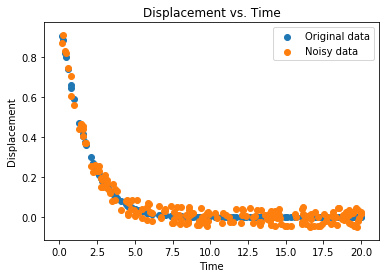

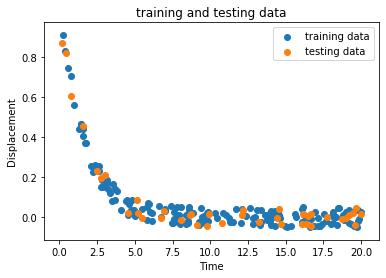

Corresponding training displacement(noisy) Values-
 [0.012114523519878694, 0.011962191124819355, 0.021128028291206583, 0.1652238709720431, -0.033743921176116055, -0.030045130547632564, 0.03776347150380173, -0.04259176168023852, -0.027781109900920652, 0.010633365870001231, -0.006280445814173314, 0.9118684082176651, 0.051668979738649576, -0.026009650354767492, -0.00454215244600646, -0.00040243557737388615, 0.0397503439795191, 0.04408580622368208, -0.01827759821620255, 0.021340788445999286, -0.04945255014185681, 0.0012820868847504194, 0.2602778518205511, 0.2306932129895687, 0.0686708193856469, -0.0014368792027654033, 0.030294480281623248, 0.011193369132631113, -0.0007245760970876324, 0.02719041054176275, -0.04624420055202755, 0.025796683588185036, -0.029657506310494262, 0.05186935550928019, 0.025325143850235356, 0.08661128285548621, -0.047184409619183305, -0.018091852480050657, 0.03868932885360951, -0.005022998567517587, 0.009288110312210884, -0.020209796022727218, -0.04355650269263254, 0

In [30]:
import math
import random  # required for creating random time points and noisy data
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split   #required for splitting the noisy data into training and testing data

#input parameters and initial conditions
k=13
m=25
#input c such that it is an underdamped system
c=35
initial_displ=1
initial_velocity=0
N=200               #number of random time points when sensor measures displacement
time_of_observation=20   #entering the time interval uptill which observations are made
noise_level = 0.05 

# Generating random time points
random_times = [random.uniform(0, time_of_observation) for i in range(N)]


def calculate_displacement(t):
    #Calculating critical_damping  and damping_ratio, to find it the system is under, over or critically damped
    critical_damping=2*((k*m)**(1/2))
    damping_ratio=c/critical_damping
    #calculating natural and damped frequencies
    wn=(k/m)**(1/2)
    wd=((1-(damping_ratio**2))**(1/2))*wn
    #Taking c such that it is an underdamped system and then finding the solution of displacement
    x=math.exp(-damping_ratio*wn*t)*((initial_displ*math.cos(wd*t)) + (initial_velocity + ((damping_ratio*wn*initial_displ))*math.sin(wd*t)/wn))
    return x

# Calculating displacement for random time points
x_values = [calculate_displacement(t) for t in random_times]

#printing the time points and corresponding displacement values

print("Random Time Points-\n", random_times)
print()
print("Corresponding displacement(x) Values-\n", x_values)

# Adding noise in the level of noise level set as 0.1
noisy_x_values = [x + random.uniform(-noise_level, noise_level) for x in x_values]

#plotting the displacement vs time graph for the system under study
plt.scatter(random_times, x_values,label='Original data')
plt.scatter(random_times, noisy_x_values,label='Noisy data')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Displacement vs. Time')
plt.legend()
plt.show()

#splitting the data(noisy) into training and testing data in ratio 80:20 and plotting it too
random_times_train, random_times_test, noisy_x_train, noisy_x_test = train_test_split(random_times, noisy_x_values, test_size=0.2)

plt.scatter(random_times_train, noisy_x_train,label='training data')
plt.scatter(random_times_test, noisy_x_test,label='testing data')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('training and testing data')
plt.legend()
plt.show()

#printing the time points and corresponding displacement(noisy) values

print("Corresponding training displacement(noisy) Values-\n", noisy_x_train)
print()
print("Corresponding testing displacement(noisy) Values-\n", noisy_x_test)

In [31]:
#in the basis function we are basically writing each input point x1 as 1,x1,x1^2,x1^3.....
#we are transforming input into higher dimensional space
#in order to capture the non linear relationship

import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv

n = int(input("Enter the degree of the polynomial: "))

def basis_function(noisy_x_train, n):
    # Creating the basis matrix and filling with polynomial terms
    basis_matrix = np.zeros((len(noisy_x_train), n + 1))
    for i in range(n + 1):
        basis_matrix[:, i] = np.power(noisy_x_train, i)
    return basis_matrix

basis_matrix_train = basis_function(noisy_x_train, n)
#the matrix is of the order N(number of input data points) X (n+1)(n is degree of polynomial)
print("Basis Matrix(train):")
print(basis_matrix_train)

basis_matrix_test = basis_function(noisy_x_test, n)
#the matrix is of the order N(number of input data points) X (n+1)(n is degree of polynomial)
print("Basis Matrix(test):")
print(basis_matrix_test)

Enter the degree of the polynomial: 3
Basis Matrix(train):
[[ 1.00000000e+00  1.21145235e-02  1.46761680e-04  1.77794783e-06]
 [ 1.00000000e+00  1.19621911e-02  1.43094017e-04  1.71171797e-06]
 [ 1.00000000e+00  2.11280283e-02  4.46393579e-04  9.43141618e-06]
 [ 1.00000000e+00  1.65223871e-01  2.72989275e-02  4.51043448e-03]
 [ 1.00000000e+00 -3.37439212e-02  1.13865222e-03 -3.84225906e-05]
 [ 1.00000000e+00 -3.00451305e-02  9.02709870e-04 -2.71220359e-05]
 [ 1.00000000e+00  3.77634715e-02  1.42607978e-03  5.38537231e-05]
 [ 1.00000000e+00 -4.25917617e-02  1.81405816e-03 -7.72639330e-05]
 [ 1.00000000e+00 -2.77811099e-02  7.71790067e-04 -2.14411847e-05]
 [ 1.00000000e+00  1.06333659e-02  1.13068470e-04  1.20229841e-06]
 [ 1.00000000e+00 -6.28044581e-03  3.94439996e-05 -2.47725902e-07]
 [ 1.00000000e+00  9.11868408e-01  8.31503994e-01  7.58222223e-01]
 [ 1.00000000e+00  5.16689797e-02  2.66968347e-03  1.37939821e-04]
 [ 1.00000000e+00 -2.60096504e-02  6.76501912e-04 -1.75955782e-05]
 [ 

In [32]:
#applying weight formula as derieved in class by minimising MSE in linear regression case
#instead of x we enter the basis matrix of noisy_x_train as generated above

basis_matrix_transpose = np.transpose(basis_matrix_train)
A=np.dot(basis_matrix_transpose, basis_matrix_train)
inverse_A = np.linalg.inv(A)
B=np.dot(inverse_A, basis_matrix_transpose)
C=np.transpose(random_times_train)
D=np.dot(B,C)
print("The weight matrix is:")
#order of the matrix depends on degree of polynomial n + 1
print(D)

The weight matrix is:
[ 12.47996853 -65.39606818 115.62916221 -64.74205767]


In [33]:
# Predicting time by inputing training data and using the weight matrix derived above
predicted_times_train = np.dot(basis_matrix_train, D)
print("Predicted time using training data:")
print(predicted_times_train)

# Predicting time by inputing testing data(in the form of basis matrix_test)
# we are using the same weight matrix as derived above(using training data points)

predicted_times_test = np.dot(basis_matrix_test, D)
print("Predicted time using testing data:")
print(predicted_times_test)



Predicted time using training data:
[11.70458114 11.71412328 11.14928405  4.53951431 14.82083726 14.55093745
 10.17179578 15.48006253 14.38737347 11.79758438 12.8952619  -0.09539679
  9.40078316 14.26025992 12.77939907 12.50630496 10.0590904   9.81611484
 13.7142752  11.13639653 16.00457814 12.39631501  2.1505087   2.75238871
  8.51347183 12.5741737  10.60314791 11.76236275 12.52741369 10.78600789
 15.75783603 10.86880304 14.52284535  9.38997398 10.89691237  7.64126105
 15.82987767 13.7013351  10.1191703  12.81137847 11.88248597 13.84937123
 15.5531105  12.23758452 12.10887677 10.06936943 14.71150699  0.56320396
  0.8217988   9.49153493  9.90316104 10.7356691   9.60260811  3.88161867
 10.48372401 10.18641116 10.13758321  9.82565948  0.56388844  0.57586793
 11.8482921  14.5116106  12.39410275 11.75665344 10.29523707 11.39026589
 13.03688097 12.02313677 11.18123963 15.65561852 11.97891331  4.97231347
 14.87248371 14.77981745 13.24412736 15.0441641  11.89028428  0.76238093
  2.21392859 14

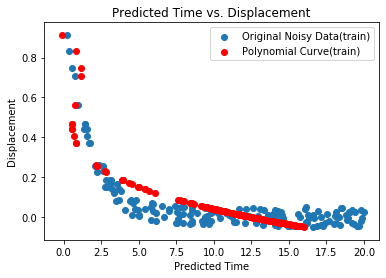

In [34]:
#for Training data case
# Plotting the random time data points against the original noisy data points
plt.scatter(random_times_train, noisy_x_train, label='Original Noisy Data(train)')

# Plotting the polynomial curve as derieved from polynomial regression model by inputting training data
# Plotting the the predicted time data points against the original noisy data points
plt.scatter(predicted_times_train, noisy_x_train, color='red', label='Polynomial Curve(train)')

plt.xlabel('Predicted Time')
plt.ylabel('Displacement')
plt.title('Predicted Time vs. Displacement')
plt.legend()
plt.show()


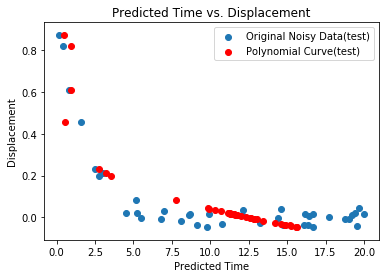

In [35]:
#Similarly for testing data case
plt.scatter(random_times_test, noisy_x_test, label='Original Noisy Data(test)')


plt.scatter(predicted_times_test, noisy_x_test, color='red', label='Polynomial Curve(test)')

plt.xlabel('Predicted Time')
plt.ylabel('Displacement')
plt.title('Predicted Time vs. Displacement')
plt.legend()
plt.show()

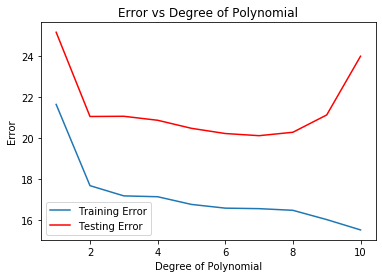

In [36]:
#plotting the testing and training error with degree of polynomial n or the capacity

#creating array so that values can be appended
training_errors = []
testing_errors = []

#varying the degree of polynomial
#can be changed depending on the region we want to focus
degrees = range(1, 11)

for n in degrees:
    def basis_functionA(noisy_x_train, n):
    # Creating the basis matrixeach time and filling it depending on n
        basis_matrixA = np.zeros((len(noisy_x_train), n + 1))
        for i in range(n + 1):
            basis_matrixA[:, i] = np.power(noisy_x_train, i)
        return basis_matrixA

        #defining the basis matrix for both training and testing case
    basis_matrix_trainA = basis_functionA(noisy_x_train, n)
    basis_matrix_testA = basis_functionA(noisy_x_test, n)
    
    #Finding the weight matrix which depends only on the training data
    basis_matrix_transposeA = np.transpose(basis_matrix_trainA)
    A = np.dot(basis_matrix_transposeA, basis_matrix_trainA)
    inverse_A = np.linalg.inv(A)
    B = np.dot(inverse_A, basis_matrix_transposeA)
    C = np.transpose(random_times_train)
    D = np.dot(B, C)
    #D is the respective weight matrix
    predicted_times_train = np.dot(basis_matrix_trainA, D)
    predicted_times_test = np.dot(basis_matrix_testA, D)
    
    #find the error and also divind it by the number of data points taken so that the training error range doesn't shoot up
    training_error = np.sum((predicted_times_train - random_times_train) ** 2)/ len(noisy_x_train)
    #adding the error value one by one to the array created above
    training_errors.append(training_error)
    testing_error = np.sum((predicted_times_test - random_times_test) ** 2/ len(noisy_x_test))
    testing_errors.append(testing_error)


# Plotting training error and testing error vs degree of polynomial n
plt.plot(degrees, training_errors, label='Training Error')
plt.plot(degrees, testing_errors, color='red', label='Testing Error')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Error')
plt.title('Error vs Degree of Polynomial')
plt.legend()
plt.show()

